DQN :  
https://medium.com/@gtnjuvin/my-journey-into-deep-q-learning-with-keras-and-gym-3e779cc12762  
https://www.youtube.com/watch?v=5fHngyN8Qhw

Double DQN :  
https://towardsdatascience.com/deep-reinforcement-learning-build-a-deep-q-network-dqn-to-play-cartpole-with-tensorflow-2-and-gym-8e105744b998

# Q-Learning with Double DQN

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import gym
import matplotlib.pyplot as plt

from qlearning import *

### Exemple Cartpole

In [3]:
env = gym.make('CartPole-v1')
episodes = 20

input_shape = env.observation_space.shape[0]
n_actions = env.action_space.n
batch_size = 128
memory_max_size = 1000
copy_weights_step = 10

agent = Agent(input_shape,
              batch_size,
              memory_max_size,
              n_actions,
              name="cartpole")


## Epsilon-greedy strategy

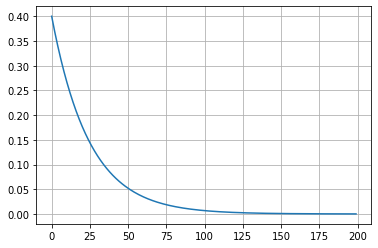

In [4]:
epsilon = 0.4
epsilon_min = 0.01
epsilon_decay = 0.96
n_episodes = 200
plt.plot(epsilon*np.power(epsilon_decay*np.ones(n_episodes), np.arange(n_episodes)))
plt.grid()

# Run Agent

In [5]:
%%time
scores = []
epsilons = []

for i in range(episodes):
    
    score = run_episode(agent=agent, env=env, remember=True, render=False)
    
    agent.learn()
    if i % copy_weights_step == 0:
        agent.copy_weights()
        print("Weights transfered")
    
    scores.append(score)
    epsilons.append(agent.epsilon)            
            
    print(f"Episode {i}, score: {score}, memory_counter={agent.memory.memory_counter}")

Weights transfered
Episode 0, score: 17.0, memory_counter=17
Episode 1, score: 16.0, memory_counter=33
Episode 2, score: 13.0, memory_counter=46
Episode 3, score: 16.0, memory_counter=62
Episode 4, score: 20.0, memory_counter=82
Episode 5, score: 9.0, memory_counter=91
Episode 6, score: 17.0, memory_counter=108
Episode 7, score: 18.0, memory_counter=126
Episode 8, score: 38.0, memory_counter=164
Episode 9, score: 19.0, memory_counter=183
Weights transfered
Episode 10, score: 13.0, memory_counter=196
Episode 11, score: 15.0, memory_counter=211
Episode 12, score: 12.0, memory_counter=223
Episode 13, score: 26.0, memory_counter=249
Episode 14, score: 13.0, memory_counter=262
Episode 15, score: 16.0, memory_counter=278
Episode 16, score: 17.0, memory_counter=295
Episode 17, score: 15.0, memory_counter=310
Episode 18, score: 10.0, memory_counter=320
Episode 19, score: 20.0, memory_counter=340
Wall time: 12.5 s


In [15]:
# agent.save_model()
# agent.save_memory()

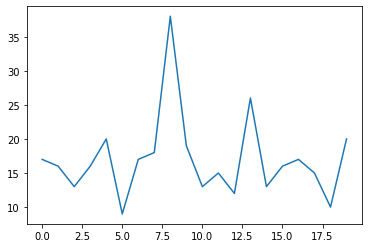

In [7]:
plt.plot(scores);

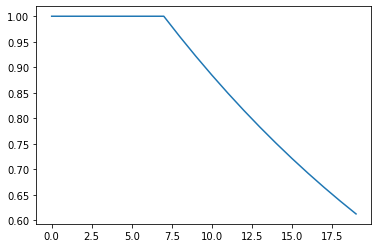

In [6]:
plt.plot(epsilons);

## Use agent

In [127]:
run_episode(agent=agent, env=env, remember=False, render=True, sleep=0.05)

40.0